In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('wine.csv')

In [6]:
df.shape

(178, 13)

In [8]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [9]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


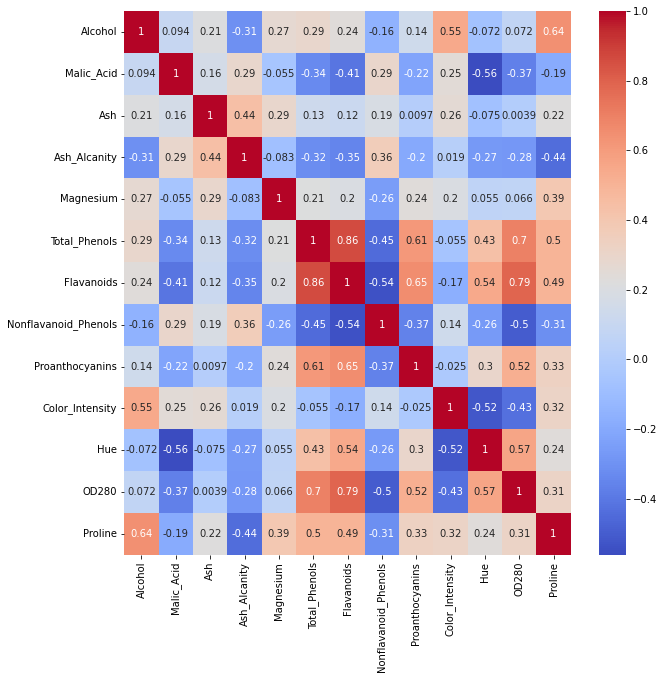

In [17]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [18]:
df.drop(columns=['Flavanoids'], inplace= True)

In [19]:
x = df.iloc[:,].values
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [20]:
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(x) 
x = norm.transform(x)

# KMeans Clustering

In [21]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

clusterer = KMeans(5, random_state=0)
clusterer.fit(x)

clusterer.labels_

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 1, 4, 4, 1, 4,
       4, 4, 1, 4, 1, 4, 4, 3, 4, 4, 4, 1, 4, 2, 4, 4, 1, 0, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 4, 4, 3, 4, 4, 4, 2, 4, 4, 2, 4, 4, 1, 4, 1, 4, 4,
       2, 4, 1, 1, 1, 1, 4, 4, 0, 2, 2, 2, 2, 2, 2, 4, 4, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
# getting the optimum value of k for our KMeans model using the Elbow Method

Error = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

C:\Users\Clement\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Clement\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


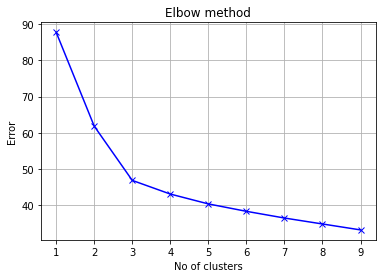

In [24]:
plt.plot(range(1, 10), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

From the above Elbow Method, 4 clusters are ideal

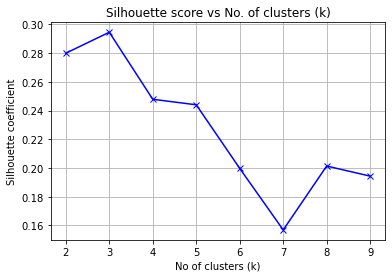

In [25]:
#Silhouette Analysis model


from sklearn.metrics import silhouette_score

silhouette = [] 

K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x) 
    silhouette.append(silhouette_score(x, kmeans.labels_))

    
plt.plot(range(2, 10), silhouette, 'bx-')
plt.title('Silhouette score vs No. of clusters (k)')
plt.xlabel('No of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True);

The silhouette coefficient is highest when k = 3, implying that the optimal number of clusters is 2 and hence three segments for our dataset.

In [26]:
# add these cluster labels to our dataset
df['kmeans_cluster'] = clusterer.predict(x)

# previewing a sample of our dataset

df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster
93,12.29,2.83,2.22,18.0,88,2.45,0.25,1.99,2.15,1.15,3.30,290,4
54,13.74,1.67,2.25,16.4,118,2.60,0.21,1.62,5.85,0.92,3.20,1060,3
117,12.42,1.61,2.19,22.5,108,2.00,0.34,1.61,2.06,1.06,2.96,345,4
99,12.29,3.17,2.21,18.0,88,2.85,0.45,2.81,2.30,1.42,2.83,406,2
69,12.21,1.19,1.75,16.8,151,1.85,0.14,2.50,2.85,1.28,3.07,718,4
87,11.65,1.67,2.62,26.0,88,1.92,0.40,1.34,2.60,1.36,3.21,562,1
163,12.96,3.45,2.35,18.5,106,1.39,0.40,0.94,5.28,0.68,1.75,675,0
149,13.08,3.90,2.36,21.5,113,1.41,0.34,1.14,9.40,0.57,1.33,550,0
75,11.66,1.88,1.92,16.0,97,1.61,0.34,1.15,3.80,1.23,2.14,428,4
58,13.72,1.43,2.50,16.7,108,3.40,0.19,2.04,6.80,0.89,2.87,1285,3


# Hierarchical Agglomerative Clustering

In [27]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering
agglo_clusterer = AgglomerativeClustering(n_clusters= 5, linkage='ward', affinity='euclidean').fit(x) 

# get the labels
labels2 = agglo_clusterer.labels_
labels2

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 0, 0, 3, 3,
       2, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4,
       1, 1], dtype=int64)

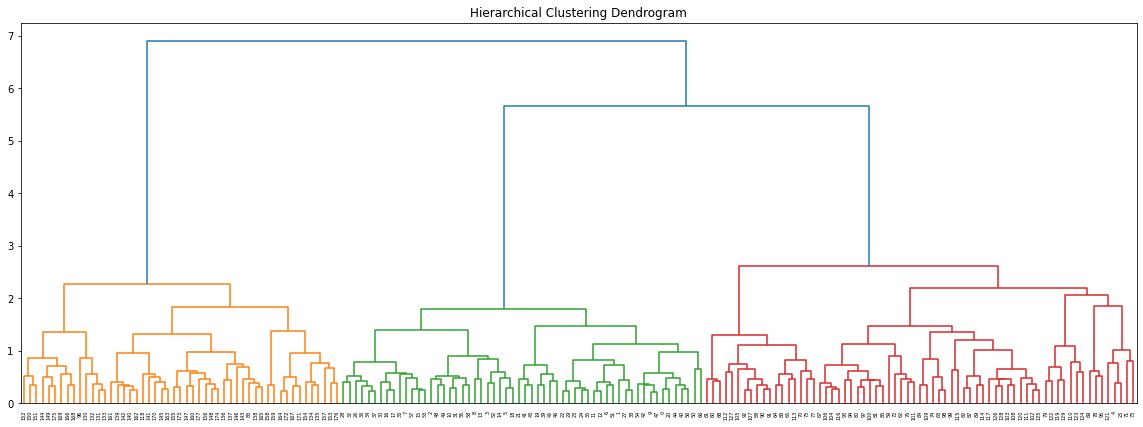

In [29]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

plt.figure(figsize=(20, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = hierarchy.dendrogram(hierarchy.linkage(x, method='ward'))

From the dendrogram we can deduce that 3 is the optimal number of clusters for this particular dataset.

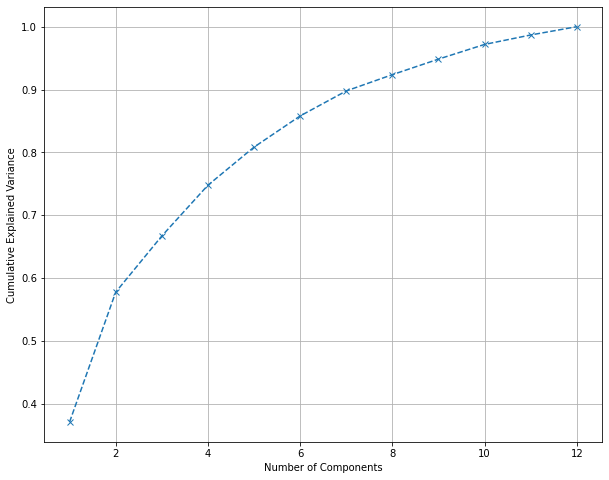

In [30]:
# improving agglomerative clustering model

from sklearn.decomposition import PCA

# fitting PCA to our data 
pca = PCA()
pca.fit(x)

evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

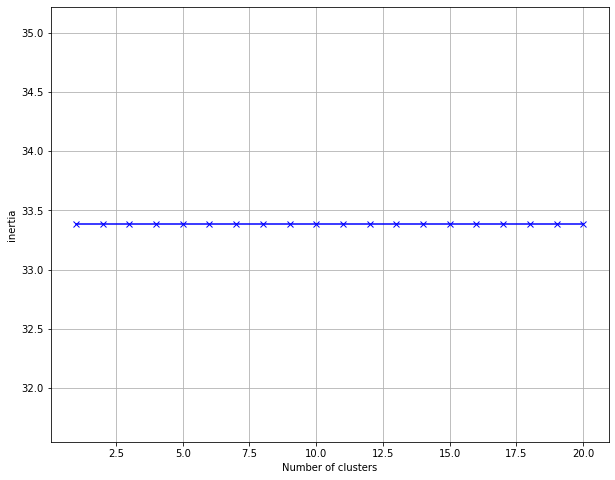

In [31]:
# using the hierachy Method to determine the ideal number of clusters for K-Means

wcss = [] # stands for "Within Cluster Sum of Squares"
for i in range(1, 21):
    agglo_clusterer = AgglomerativeClustering(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# visualizing the inertia (WCSS)
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), wcss, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.show()

Is your agglomerative model with a new value for k better than the first one?

In [32]:
# adding to our dataset
df['agglo_clusterer'] = labels2

# previewing a sample of our dataset
df.sample(20)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster,agglo_clusterer
133,12.70,3.55,2.36,21.5,106,1.70,0.17,0.84,5.00,0.78,1.29,600,0,4
7,14.06,2.15,2.61,17.6,121,2.60,0.31,1.25,5.05,1.06,3.58,1295,3,2
72,13.49,1.66,2.24,24.0,87,1.88,0.27,1.03,3.74,0.98,2.78,472,4,0
146,13.88,5.04,2.23,20.0,80,0.98,0.40,0.68,4.90,0.58,1.33,415,0,1
40,13.56,1.71,2.31,16.2,117,3.15,0.34,2.34,6.13,0.95,3.38,795,3,2
43,13.24,3.98,2.29,17.5,103,2.64,0.32,1.66,4.36,0.82,3.00,680,2,2
30,13.73,1.50,2.70,22.5,101,3.00,0.29,2.38,5.70,1.19,2.71,1285,3,2
152,13.11,1.90,2.75,25.5,116,2.20,0.26,1.56,7.10,0.61,1.33,425,0,4
136,12.25,4.72,2.54,21.0,89,1.38,0.53,0.80,3.85,0.75,1.27,720,0,1
64,12.17,1.45,2.53,19.0,104,1.89,0.45,1.03,2.95,1.45,2.23,355,1,3


In [33]:
pd.value_counts(df['agglo_clusterer'])

2    58
0    51
1    37
3    18
4    14
Name: agglo_clusterer, dtype: int64

When carrying out kmeans clustering cluster 0 had the highest number of elements.

The alcohols of cluster 0 should be considered as the brands of wine more accessible at an affordable price. And then alcohols of cluster 1 is inaccessible and expensive.